In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from linear_regression import LinearReg

In [2]:
# Read in the file
df = pd.read_csv('Fish.csv')
df

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

In [3]:
# Take a look at the counts of different species
print(df['Species'].value_counts())

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64


In [4]:
# Observe the correlation using seaborn 
sns.pairplot(df, hue='Species')

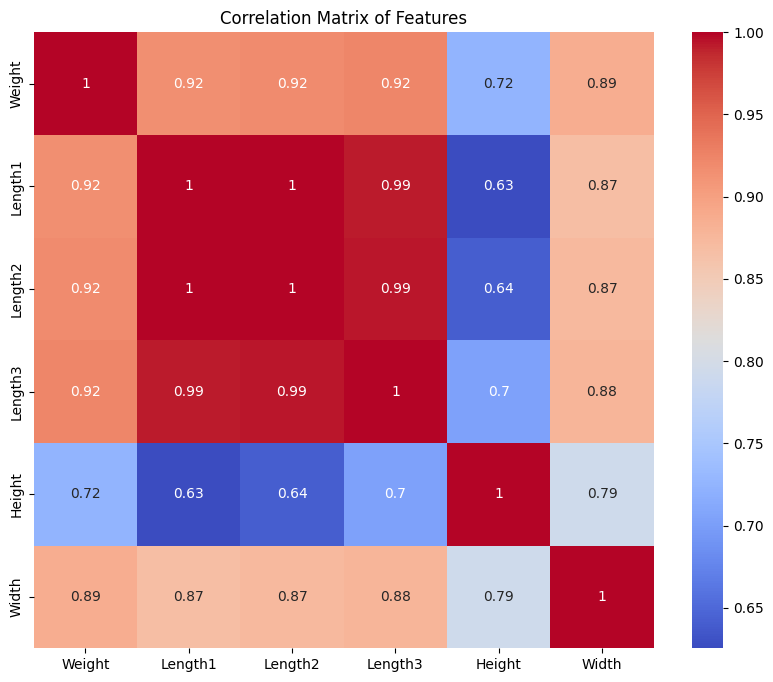

In [5]:
# Compute pairwise correlation of columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Compute pairwise correlation of columns
corr_matrix = df[numeric_columns].corr()

# Use seaborn to plot a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

In [6]:
# We will make use of the species for regression
# by one-hot encoding.

from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for 'Species' columns
encoder = OneHotEncoder(sparse=False)
encoded_species = encoder.fit_transform(df[['Species']])
encoded_df = pd.concat([df.drop('Species', axis=1), pd.DataFrame(encoded_species)], axis=1)

encoded_df

/Users/harringtontung/opt/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Weight  Length1  Length2  Length3   Height   Width    0    1    2    3  \
0     242.0     23.2     25.4     30.0  11.5200  4.0200  1.0  0.0  0.0  0.0   
1     290.0     24.0     26.3     31.2  12.4800  4.3056  1.0  0.0  0.0  0.0   
2     340.0     23.9     26.5     31.1  12.3778  4.6961  1.0  0.0  0.0  0.0   
3     363.0     26.3     29.0     33.5  12.7300  4.4555  1.0  0.0  0.0  0.0   
4     430.0     26.5     29.0     34.0  12.4440  5.1340  1.0  0.0  0.0  0.0   
..      ...      ...      ...      ...      ...     ...  ...  ...  ...  ...   
154    12.2     11.5     12.2     13.4   2.0904  1.3936  0.0  0.0  0.0  0.0   
155    13.4     11.7     12.4     13.5   2.4300  1.2690  0.0  0.0  0.0  0.0   
156    12.2     12.1     13.0     13.8   2.2770  1.2558  0.0  0.0  0.0  0.0   
157    19.7     13.2     14.3     15.2   2.8728  2.0672  0.0  0.0  0.0  0.0   
158    19.9     13.8     15.0     16.2   2.9322  1.8792  0.0  0.0  0.0  0.0   

       4    5    6  
0    0.0  0.0  0.0  
1    0.0  0.0  0.0  
2    0.0  0.0  0.0  
3    0.0  0.0  0.0  
4    0.0  0.0  0.0  
..   ...  ...  ...  
154  0.0  1.0  0.0  
155  0.0  1.0  0.0  
156  0.0  1.0  0.0  
157  0.0  1.0  0.0  
158  0.0  1.0  0.0  

[159 rows x 13 columns]

In [7]:
# Read in the random train/test split we did for you.
import pickle as pkl
with open('experiments.pkl', 'rb') as f:
    indices = pkl.load(f)

In [8]:
from sklearn.model_selection import train_test_split

# train/test split with first 80% indices as training sample
# use the rest of the features to predict the Weight of the fish
train_df = encoded_df.loc[indices[:int(0.8*len(indices))]]
test_df = encoded_df.loc[indices[int(0.8*len(indices)):]]

# use the rest of the features to predict the Weight of the fish
X_train = train_df.drop('Weight', axis=1).values
y_train = train_df[['Weight']].values
X_test = test_df.drop('Weight', axis=1).values
y_test = test_df[['Weight']].values

# train_df = df.loc[indices[:int(0.8*len(indices))]]
# test_df = df.loc[indices[int(0.8*len(indices)):]]
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[33.7 36.4 39.6 ...  0.   0.   1. ]
 [31.5 34.5 39.7 ...  0.   0.   0. ]
 [37.  40.  42.4 ...  0.   0.   0. ]
 ...
 [38.  41.  46.5 ...  0.   0.   0. ]
 [21.1 22.5 25.  ...  1.   0.   0. ]
 [25.9 28.  29.4 ...  0.   0.   0. ]]
[[20.5    22.5    24.      5.856   3.624   0.      0.      1.      0.
   0.      0.      0.    ]
 [31.4    34.     39.2    15.9936  5.3704  1.      0.      0.      0.
   0.      0.      0.    ]
 [25.2    27.3    28.7     8.323   5.1373  0.      0.      1.      0.
   0.      0.      0.    ]
 [12.5    13.7    14.7     3.528   1.9992  0.      0.      1.      0.
   0.      0.      0.    ]
 [17.2    19.     20.2     5.6358  3.0502  0.      0.      1.      0.
   0.      0.      0.    ]
 [30.4    33.     38.3    14.8604  5.2854  1.      0.      0.      0.
   0.      0.      0.    ]
 [25.     26.5    28.      7.168   4.144   0.      0.      1.      0.
   0.      0.      0.    ]
 [30.     32.3    34.8     5.568   3.3756  0.      0.      0.      1.
   0.      0.      0.  

In [9]:
# standardize the data using the training set
# no sklearn method allowed here

# replace the NaNs with 0
X_train = np.nan_to_num(X_train)
X_train = X_train.astype('int')
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

print("Shape of X_train: ", X_train.shape)
print("Shape of mean: ", mean.shape)
print("Shape of std: ", std.shape)


X_train_std = (X_train - mean) / std
X_test_std = (X_test - mean) / std
print(X_train_std)
print(X_test_std)

Shape of X_train:  (127, 12)
Shape of mean:  (12,)
Shape of std:  (12,)
[[ 0.64494065  0.6618887   0.64612701 ... -0.3796632  -0.33769082
   4.93963561]
 [ 0.45512034  0.48566257  0.64612701 ... -0.3796632  -0.33769082
  -0.20244408]
 [ 1.02458127  1.01434096  0.89279473 ... -0.3796632  -0.33769082
  -0.20244408]
 ...
 [ 1.11949142  1.10245403  1.22168503 ... -0.3796632  -0.33769082
  -0.20244408]
 [-0.49398119 -0.57169422 -0.50498904 ...  2.63391344 -0.33769082
  -0.20244408]
 [-0.11434058 -0.04301583 -0.17609874 ... -0.3796632  -0.33769082
  -0.20244408]]
[[-0.54143627 -0.52763769 -0.58721162 -0.59404405 -0.20188073 -0.51961524
  -0.27617239  1.42260659 -0.36596253 -0.3796632  -0.33769082 -0.20244408]
 [ 0.49308441  0.48566257  0.66257152  1.72859444  0.7986487   1.9245009
  -0.27617239 -0.70293502 -0.36596253 -0.3796632  -0.33769082 -0.20244408]
 [-0.09535855 -0.10469497 -0.20076552 -0.02882653  0.66510346 -0.51961524
  -0.27617239  1.42260659 -0.36596253 -0.3796632  -0.33769082 -0.

In [10]:
# use the linear_regression model to solve this problem
# from linear_regression import LinearReg

# create the model
model = LinearReg(indim=X_train_std.shape[1], outdim=1)
# fit the model
model.fit(X_train_std, y_train)
# compute the loss on the training set
train_pred = model.predict(X_train_std)
train_loss = np.mean((train_pred - y_train)**2)
# print(train_pred)
# print(train_loss)
# compute the loss on the test set
test_pred = model.predict(X_test_std)
test_loss = np.mean((test_pred - y_test)**2)
# report the losses
print("Training loss: ", train_loss)
print("Test loss: ", test_loss)

Training loss:  14767.007464687093
Test loss:  12530.681968770252


In [11]:
# Bonus: Further Analysis
# Can you further analyze the result yielded and make improvement?